---
title: "Julia for the beginner*"
subtitle: "*For someone familiar with Python programming and new to Julia"
description: "Disclaimer: example codes were generated using ChatGPT and tested."
author: "Yiwei Mao"
date: "11/04/2023"
#date-modified: "11/06/2023"
format:
  html:
    code-tools: true
    code-fold: false
jupyter: julia-1.9
---


I am approaching this as someone familiar with programming in Python which I think is most people. This guide is a summary of my learning experience in the hope that it is helpful for others learning Julia for the first time. 

# How is Julia different from Python?
Julia is a functional program language designed to run as fast as C compiled code. However, instead of running code through an interpreter, Julia code needs to be compiled first. It is able to be fast because of type stability and using functions mean you avoid global variables. Interestingly, Julia can be similar to Python with dynamic typing and can be used interactively. One major difference is that, like Matlab, array indices start 1 rather than 0. Julia is written in Julia which cannot be said for Python. Julia also does not have the Global Interpreter Lock issue of Python. 

Where Julia is lacking is good documention and support for packages as it is a smaller community than the behemoth that is the Python ecosystem. This project is one step towards making it easier to practioners to produce documented source code and therefore promote collaboration. 

# Core packages to install

There a few packages that will make it easier to start. These can be installed using `Pkg`. 

In [ ]:
using Pkg

::: {.callout-note}
You can also enter the package manager using `]` and exit using backspace. In this mode, packages can be installed with `add package_to_install`. 
:::


In [ ]:
#| output: false
Pkg.add("IJulia")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [ ]:
#| output: false
Pkg.add("PlotlyJS")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`




:::{.callout-important}
To use the Plotly backend, just run
```julia
using PlotlyJS
```
at the start. 
:::

and 

## Revise.jl

Revise.jl is a Julia package that provides a way to update function definitions in a running Julia session. This package is particularly useful during development, where you might iteratively change your code and want those changes to be reflected in your session without restarting it.

The key feature of Revise.jl is that it can track changes in your source code and, upon saving the file, automatically update those changes in the Julia environment. This means that after editing your Julia source files, the changes can be immediately tested in the REPL, Jupyter notebook, or other interactive environments without the need for manual recompilation or restarting Julia.


```julia
Pkg.add("Revise")
```


In [ ]:
using Revise

## Other Julia resources

For a summary of Julia features, check out <https://cheatsheet.juliadocs.org/>.

I went through the MIT course introducing Julia which was excellently designed and motivated. Highly recommended!  
The course is called Introduction to Computational Thinking  <https://computationalthinking.mit.edu/Fall23/> 
and I think it is well titled as I certainly had to develop a different way of thinking to code in Julia. Below are some major points that changes the way you code. 


# Types and Functions (No Classes and Methods)

This continues to be thing that frustrates me as I got really used to object oriented programming. Instead of class objects which contain attributes and methods, you can simulate a similar thing in Julia with mutable struct types and functions that apply on those structs. 

I got so used to tab complete when accessing attributes and methods for each class object and now I have to keep track of which functions apply to types which is available in the current namespace. 

You can constructor when you define a struct to check the values make sense kind of like using `__init__(self)` in Python. 


In [ ]:
using Dates
mutable struct Car
    model::String
    year::Int
    is_electric::Bool
    mileage::Float64

    # Custom constructor
    function Car(model::String, year::Int, is_electric::Bool, mileage::Float64)
        current_year = Dates.year(Dates.today())
        if year > current_year || year < 1886  # The year the first car was invented
            error("Invalid year of manufacture: $year")
        end
        if mileage < 0
            error("Mileage cannot be negative: $mileage")
        end
        new(model, year, is_electric, mileage)
    end
end

# Assuming the current year is 2023 for this example
my_car = Car("Tesla Model S", 2020, true, 15000.0)
println(my_car)

Car("Tesla Model S", 2020, true, 15000.0)



## Structs are immutable

A struct datatype is like a Python class with only immutable attributes. It defines a data type. To make a struct mutatble, simply use `mutable struct` instead of `struct`. 


In [ ]:
# Define a mutable struct named Person
mutable struct Person
    name::String
    age::Int
end

# Create an instance of Person
julia = Person("Julia", 30)

# Since it's mutable, we can change the fields after creation
julia.age = 31  # This is allowed and the age is updated to 31

println("Name: ", julia.name, ", Age: ", julia.age)  # Outputs: Name: Julia, Age: 31

Name: Julia, Age: 31


# Multiple Dispatch
This is my favourite part of using Julia which allows functions to specialise on types so that the behaviour of a function depends on the types of its arguments. In other words, it allows you to define functions with the same name but different behaviors depending on the types of their arguments. Here's an example that demonstrates this:


In [ ]:
# A simple function that takes one argument and prints a message
function greet(person::String)
    println("Hello, $(person)!")
end

# Another version of the function 'greet' that takes an integer
function greet(times::Int)
    println("I will greet you $(times) times!")
end

# Yet another version that takes a String and an Int
function greet(person::String, times::Int)
    for i in 1:times
        println("Hello, $(person)! This is time number $i.")
    end
end

# Calling the different versions of the function based on the argument types
greet("Alice")           # Calls the first version with a String
greet(3)                 # Calls the second version with an Int
greet("Bob", 2)          # Calls the third version with a String and an Int


Hello, Alice!
I will greet you 3 times!
Hello, Bob! This is time number 1.
Hello, Bob! This is time number 2.


# Broadcasting

Broadcasting in Julia is a way to apply a function to each element of an array (or to each element of a collection of arrays, element-wise) without the need for explicitly writing a loop. This is done using the dot . operator before the function name or operator. Here's an example:

In [ ]:
# Define an array
array = [1, 2, 3, 4]

# We'll create a function that squares a number
square(x) = x^2

# Now we use broadcasting to apply the 'square' function to each element of the array
squared_array = square.(array)

println("array squared: ",squared_array)  # Output: [1, 4, 9, 16]

# Broadcasting can also be used with operators. For example, to add 2 to each element:
incremented_array = array .+ 2

println("array incremented by 2: ",incremented_array)  # Output: [3, 4, 5, 6]


array squared: [1, 4, 9, 16]
array incremented by 2: [3, 4, 5, 6]


# Bang 

An exclaimation mark `!` at the end of a function is used to modify a variable in place. It is not enforced by the language but is a widely followed practice. 

::: {.callout-caution}
`!` can also be used as a logical not or as part of pattern matching. 
:::


In [ ]:
my_array = [1,2,3,4]

function add_one!(array)
    for i in eachindex(array)
        array[i] += 1
    end
end

add_one!(my_array)
my_array

4-element Vector{Int64}:
 2
 3
 4
 5

# Don't be afraid of loops

Unlike Python, loops are actually fast in Julia. There's no need to vectorise code with numpy arrays and numpy functions and loops may be the best way to do things. Even better, you can use `Distributed` to make your loops run in parallel with the macro `@distributed` without needing to change anything else in your code. 


In [ ]:
for c in "strings are immutable"
    print(c," ")
end

s t r i n g s   a r e   i m m u t a b l e 

In [ ]:
for i in 1:5
    println( sum(1:i) )
end

1
3
6
10
15


# Useful Macros

Macros allow for metaprogramming and you can write code that write code for you. They are useful for optimisation, debugging, and testing. 


You can view the code representation after type interence `@code_typed`, the byte code where loops are converted to gotos `@code_lowered`, LLVM machine code `@code_llvm`, and even native assembly code `@code_native` which Julia directly executes. 

In [ ]:
function fibonacci(N::Int64)
    if N ≤ 1
        return 1
    end
    a = 0; b = 1
    for i in 2:N
        temp = a+b
        a = b
        b = temp
    end
    return b
end

@code_lowered fibonacci(2)

CodeInfo(
1 ─       Core.NewvarNode(:(@_3))
│         Core.NewvarNode(:(b))
│         Core.NewvarNode(:(a))
│   %4  = N ≤ 1
└──       goto #3 if not %4
2 ─       return 1
3 ─       a = 0
│         b = 1
│   %9  = 2:N
│         @_3 = Base.iterate(%9)
│   %11 = @_3 === nothing
│   %12 = Base.not_int(%11)
└──       goto #6 if not %12
4 ┄ %14 = @_3
│         i = Core.getfield(%14, 1)
│   %16 = Core.getfield(%14, 2)
│         temp = a + b
│         a = b
│         b = temp
│         @_3 = Base.iterate(%9, %16)
│   %21 = @_3 === nothing
│   %22 = Base.not_int(%21)
└──       goto #6 if not %22
5 ─       goto #4
6 ┄       return b
)

Another useful macro is \@time / \@timed which are used for simple benchmarking. They measure the time taken to execute an expression and the amount of memory it allocates.

You can also use \@btime / \@benchmark which is provided by the BenchmarkTools.jl package to give more accurate and detailed performance measurements than @time.

In [ ]:
@time fibonacci(100_000)

  0.000157 seconds


2754320626097736315

## More macros

Here are some more of the commonly used macros in Julia

1. \@macroexpand: This macro shows the result of the macro expansion, which is useful for understanding what the macro does to your code.

2. \@assert: This is used for assertions in your code. It throws an AssertionError if the condition is not met.

3. \@test: Part of Julia's standard library Test, this macro is used for writing test cases.

4. \@inline / \@noinline: These control whether the compiler should inline a particular function, which can sometimes improve or worsen performance.

5. \@eval: Used to evaluate an expression in the global scope, which can be useful in metaprogramming for generating code programmatically.

6. \@everywhere: In a distributed computing environment, this macro is used to define a function or variable in every process of a Julia session.

7. \@unpack / \@pack: Provided by the Parameters.jl package, these macros are used for unpacking and packing variables into structures, which is particularly useful when dealing with many parameters or settings.

In [ ]:
using Distributed

# Add worker processes for parallel computation
addprocs(4)  # Assuming you want to add 4 worker processes

# A simple function to do some work, e.g., a costly computation
@everywhere function do_work(x)
    sleep(0.1)  # Simulating some work by sleeping for 0.1 seconds
    return x^2
end

In [ ]:
# Use @distributed to parallelize the loop
results = @distributed (+) for i in 1:100
    do_work(i)
end

# 'results' will contain the sum of the squares of numbers from 1 to 100
println(results)

338350


In the above example, the @distributed macro is used with a reduction operation (+) that specifies how the results from each iteration should be combined—in this case, they are summed. The loop runs in parallel across the available worker processes, and each process runs a portion of the loop iterations. By using @everywhere, the do_work function is defined across all processes. 


# Plotting

Plots.jl is a powerful plotting package in Julia that provides a simple and flexible interface for creating a wide variety of plots. Here is a quick example. For good measure, I also include an example of how to save the figure. 

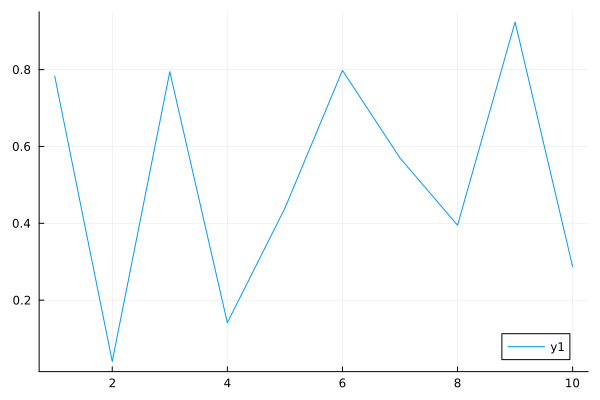

In [ ]:
using Plots

# Create some data
x = 1:10
y = rand(10)  # 10 random numbers

# Make a line plot using matplotlib backend
plot(x, y, 
    title="Random Line Plot", label="Line", 
    xlabel="X Axis", ylabel="Y Axis")

# Save the plot to a file
savefig("temp.pdf")

# Display the plot
display(plot(x, y))


In [ ]:
rm("temp.pdf") # remove the temp file

# Interoperability

You can use `PyCall` to use Python libraries in your code. It should install Conda.jl properly...


In [ ]:
#| output: false
Pkg.add("PyCall")
Pkg.build("PyCall")

In [ ]:
using PyCall

# Import the Python 'math' module
math = pyimport("math")

# Use the Python 'sin' function from the 'math' module
result = math.sin(math.pi / 4)  # Should be √2/2

println("The sine of π/4 is: $result")